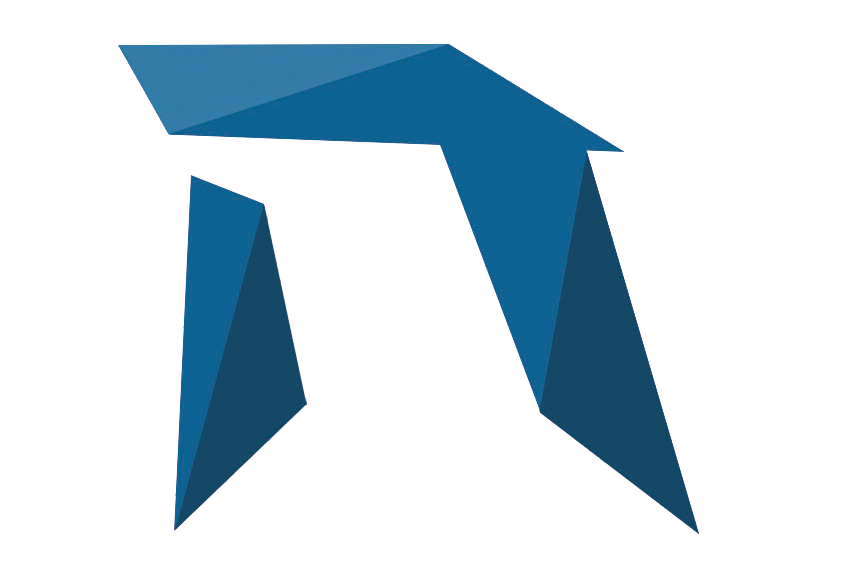

***
# HEICODERS ACADEMY
<b>AI200: Applied Machine Learning</b><br>
***
<b>Applied Unsupervised Learning Project:</b> Customer Segmentation using K-means Clustering
***

<b>Learning Outcomes:</b>

- Gain an intuition on applying K-means clustering on a real-world dataset
- Apply unsupervised learning in the area of customer segmentation for business use cases
- Be exposed to extra tips & techniques for data processing and visualisation, such as
    - Pandas `pivot_table` method generating two-dimensional summaries effortlessly
    - Sklean `silhouette_score` for determining K for K-Means Clustering
    - Principal Component Analysis (PCA) for visualising high dimension

<b>Datasets Used:</b>

- 3 excel files containing data on bicycle orders from the bicycle manufacturer Cannondale:
    - `bikes.xlsx` contains information on various bike models
    - `bikeshops.xlsx` contains information on bike shops (business clients of Cannondale)
    - `orders.xlsx` contains actual bicycle order histories with Cannondale.

_Note that in **orders.xlsx**, `customer.id` refers to the IDs of bikeshops who ordered the bike, while `product.id` refers to the IDs of specific bike models._

Introduction to The Dataset
---

First, import the following files using the `pd.read_excel` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) as pandas dataframes:

• `bikes`: **bikes.xlsx**

• `bikeshops`: **bikeshops.xlsx**

• `orders`: **orders.xlsx**

In [2]:
import pandas as pd

## Import datasets and view the shapes & first few rows of each dataframe

bikes = pd.read_excel("data/bikes.xlsx")
bikeshops = pd.read_excel("data/bikeshops.xlsx")
orders = pd.read_excel("data/orders.xlsx")

In [3]:
bikes.head()

,bike.id,model,category1,category2,frame,price
0,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790
1,2,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,10660
2,3,Supersix Evo Hi-Mod Dura Ace 1,Road,Elite Road,Carbon,7990
3,4,Supersix Evo Hi-Mod Dura Ace 2,Road,Elite Road,Carbon,5330
4,5,Supersix Evo Hi-Mod Utegra,Road,Elite Road,Carbon,4260


In [4]:
bikeshops.head()

,bikeshop.id,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude
0,1,Pittsburgh Mountain Machines,Pittsburgh,PA,40.440625,-79.995886
1,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
2,3,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
3,4,Detroit Cycles,Detroit,MI,42.331427,-83.045754
4,5,Cincinnati Speed,Cincinnati,OH,39.103118,-84.512020


In [5]:
orders.head()

,order.id,order.line,order.date,customer.id,product.id,quantity
0,1,1,2011-01-07,2,48,1
1,1,2,2011-01-07,2,52,1
2,2,1,2011-01-10,10,76,1
3,2,2,2011-01-10,10,52,1
4,3,1,2011-01-10,6,2,1


Part 1. Data Preprocessing
===
***

Before we dive right into data preprocessing and analysis, we need to develop a hypothesis for customer trends.
Developing a hypothesis is necessary as the hypothesis will guide our decisions on how
to formulate the data in such a way to cluster customers.

For the purpose of this exercise, let's suppose that we formulate the following hypothesis for the Cannondale orders -

<div class="alert alert-block alert-info">
    
<h2><i>The Hypothesis</i></h2>
    
Bike shops purchase bike models based on features such as: <br>
* <b>Mountain or Road Bikes</b> and <br>
* <b>price tier</b> (high/premium or low/affordable).
</div>

1a. Merge all three datasets into 1 dataframe
---


Let's first combine the datapoints in the `orders` DataFrame:<br>

- merge orders with `bikes` - **product.id** in orders corresponds to **bike.id** in bikes
- using the merged output, merge it again with `bikeshops` - **customer.id** corresponds to **bikeshop.id** in bikeshops
- save your final merged output to `merged_data` and print its first 5 rows

Expected output of `merged_data.columns`:

```
Index(['order.id', 'order.line', 'order.date', 'customer.id', 'product.id',
       'quantity', 'bike.id', 'model', 'category1', 'category2', 'frame',
       'price', 'bikeshop.id', 'bikeshop.name', 'bikeshop.city',
       'bikeshop.state', 'latitude', 'longitude', 'price_cat'],
      dtype='object')
```

In [6]:
# We use inner join in this case as we know that all product.ids and customer.ids
# have available corresponding data in the bikes & bikeshops datasets. When in doubt, use a left join.

merged_orders_and_bikes = orders.merge(bikes, left_on = 'product.id', right_on = 'bike.id') # we used the default how='inner'
merged_data = merged_orders_and_bikes.merge(bikeshops, left_on = 'customer.id', right_on = 'bikeshop.id')
merged_data.head()

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,category1,category2,frame,price,bikeshop.id,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude
0,1,1,2011-01-07,2,48,1,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,6070,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
1,132,6,2011-05-13,2,48,1,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,6070,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
2,507,2,2012-06-26,2,48,1,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,6070,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
3,528,18,2012-07-16,2,48,1,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,6070,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
4,691,13,2013-02-05,2,48,1,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,6070,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881


In [7]:
merged_data.columns

Index(['order.id', 'order.line', 'order.date', 'customer.id', 'product.id',
       'quantity', 'bike.id', 'model', 'category1', 'category2', 'frame',
       'price', 'bikeshop.id', 'bikeshop.name', 'bikeshop.city',
       'bikeshop.state', 'latitude', 'longitude'],
      dtype='object')

1b. Convert numerical price column to categorical variables
---

Using the **median of the price column** as the split point, let's transform the unit price of each bike (`price` column) into a categorical column `price_cat` that takes either the value **high** or **low**.

* If `price >= median_bike_price` the value should be `high`.
* else, the value should be `low`.

Hints:

* First calculate the median() of the `price` column in the bikes variable
* Explore how you could use the `.apply()` method on `price` column to generate the `price_cat` column

Expected output of the following command:

`merged_data[["order.date","bikeshop.name","model","price","price_cat"]].sample(5, random_state = 0)`

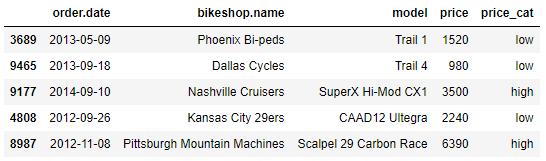

In [8]:
median_bike_price = bikes.price.median()
print("The median bike price is", median_bike_price)

merged_data["price_cat"] = merged_data.price.apply(lambda x: 'high' if x >= median_bike_price else 'low')
merged_data[["order.date","bikeshop.name","model","price","price_cat"]].sample(5, random_state = 0)

The median bike price is 3200.0


,order.date,bikeshop.name,model,price,price_cat
3689,2013-05-09,Phoenix Bi-peds,Trail 1,1520,low
9465,2013-09-18,Dallas Cycles,Trail 4,980,low
9177,2014-09-10,Nashville Cruisers,SuperX Hi-Mod CX1,3500,high
4808,2012-09-26,Kansas City 29ers,CAAD12 Ultegra,2240,low
8987,2012-11-08,Pittsburgh Mountain Machines,Scalpel 29 Carbon Race,6390,high


1c. Spread customers by quantity of bike models purchased
---
We introduce you the all-powerful `pivot_table` method, which would differentiate customers by the quantity of each bike model purchased!

To use this method, we must specify a few parameters:

* `index`: row indices for the pivot table output (pick a column name from `merged_data`)
* `column`: column indices for the pivot table output (pick a column name from `merged_data`)
* `values`: values you want to aggregate (pick a column name from `merged_data`)
* `aggfunc`: the aggregation function - in this case we want to sum up the order quantities for each client

<br><br>
Expected Output (saved to `orders_by_client` dataframe):

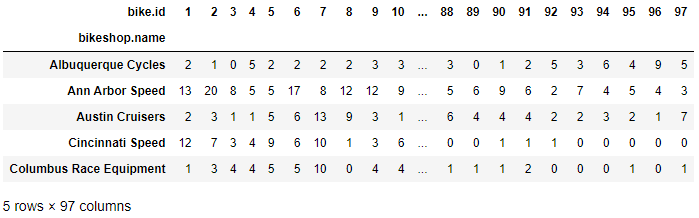

In [9]:
merged_data = merged_data.sort_values(by="bike.id")
merged_data = merged_data[["bikeshop.name","bike.id","quantity"]] # select salient columns for next step


# Here is an example of how pivot_table can be used in this case. 
# Feel free to explore the documentation if you'd like to know more!

orders_by_client = merged_data.pivot_table(index = "bikeshop.name", columns = "bike.id", values = "quantity", aggfunc = sum,
                            fill_value = 0) # Try removing this parameter. How does this affect the output?
orders_by_client.head()

bike.id,1,2,3,4,5,6,7,8,9,10,...,88,89,90,91,92,93,94,95,96,97
bikeshop.name,,,,,,,,,,,,,,,,,,,,,
Albuquerque Cycles,2,1,0,5,2,2,2,2,3,3,...,3,0,1,2,5,3,6,4,9,5
Ann Arbor Speed,13,20,8,5,5,17,8,12,12,9,...,5,6,9,6,2,7,4,5,4,3
Austin Cruisers,2,3,1,1,5,6,13,9,3,1,...,6,4,4,4,2,2,3,2,1,7
Cincinnati Speed,12,7,3,4,9,6,10,1,3,6,...,0,0,1,1,1,0,0,0,0,0
Columbus Race Equipment,1,3,4,4,5,5,10,0,4,4,...,1,1,1,2,0,0,0,1,0,1


1d. Scale the quantity data
---

For optimal K-means clustering results, scaling is important!

In this case, a reasonable scaling factor would be if each row were scaled down by the number of orders by that client. <br>
(i.e. Values under bike IDs are no longer order counts, but indicate the % of all bike orders for a particular client.)

To do this we have provided an example of how you might scale your dataset **row-wise**, such that each row adds up to 1.

In [10]:
total_orders_by_each_client = orders_by_client.sum(axis=1)
# total_orders_by_each_client    # uncomment to examine Series

In [11]:
# This code scales your dataset row-wise, such that each row adds up to 1
scaled_X = orders_by_client.div(total_orders_by_each_client, axis=0)
scaled_X.head()

bike.id,1,2,3,4,5,6,7,8,9,10,...,88,89,90,91,92,93,94,95,96,97
bikeshop.name,,,,,,,,,,,,,,,,,,,,,
Albuquerque Cycles,0.006993,0.003497,0.000000,0.017483,0.006993,0.006993,0.006993,0.006993,0.010490,0.010490,...,0.010490,0.000000,0.003497,0.006993,0.017483,0.010490,0.020979,0.013986,0.031469,0.017483
Ann Arbor Speed,0.021595,0.033223,0.013289,0.008306,0.008306,0.028239,0.013289,0.019934,0.019934,0.014950,...,0.008306,0.009967,0.014950,0.009967,0.003322,0.011628,0.006645,0.008306,0.006645,0.004983
Austin Cruisers,0.008130,0.012195,0.004065,0.004065,0.020325,0.024390,0.052846,0.036585,0.012195,0.004065,...,0.024390,0.016260,0.016260,0.016260,0.008130,0.008130,0.012195,0.008130,0.004065,0.028455
Cincinnati Speed,0.030691,0.017903,0.007673,0.010230,0.023018,0.015345,0.025575,0.002558,0.007673,0.015345,...,0.000000,0.000000,0.002558,0.002558,0.002558,0.000000,0.000000,0.000000,0.000000,0.000000
Columbus Race Equipment,0.002538,0.007614,0.010152,0.010152,0.012690,0.012690,0.025381,0.000000,0.010152,0.010152,...,0.002538,0.002538,0.002538,0.005076,0.000000,0.000000,0.000000,0.002538,0.000000,0.002538


In [12]:
# scaled_X.sum(axis=1)    # when in doubt, check with code!

Part 2. Identify Client Clusters with K-means Clustering
===
***

Next let us select the optimal K for clustering with the help of the Within-Cluster Sums of Squares (WCSS) metric and the elbow plot. We then visualise the K-means output on a 2D graph with dimensionality reduction.


## 2a. Select optimal K for K-Means Clustering

- Fit a range of K-means clustering models on `scaled_X` for multiple K values, and calculate the WCSS for each model

- **Bonus Content**: Besides elbow plots for WCSS, you could tweak a few lines of code to calculate **silhouette scores** as well! To learn more about how silhouette scores improve on the ambiguity of elbow plots, refer to this [article](https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891) and [sklearn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) for code examples.

_What is the choice of parameter `K` for K-Means clustering in the next section (how many clusters do you think there should be), and why?_

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss_vals = []
# silhouette_scores = []

for k in range(2,9):
    kmeans_model = KMeans(n_clusters = k, random_state = 0).fit(scaled_X)
    wcss = kmeans_model.inertia_
    wcss_vals.append(wcss)    
    print('WCSS for k =', k, ':', round(wcss, 4))
    
#     avg_silhouette_score = silhouette_score(X, kmeans_model.predict(scaled_X))
#     silhouette_scores.append(avg_silhouette_score)
#     print('Silhouette Score for k =', k, ':', round(avg_silhouette_score, 4))

WCSS for k = 2 : 0.142
WCSS for k = 3 : 0.1212
WCSS for k = 4 : 0.1039
WCSS for k = 5 : 0.0966
WCSS for k = 6 : 0.0894
WCSS for k = 7 : 0.0827
WCSS for k = 8 : 0.0778


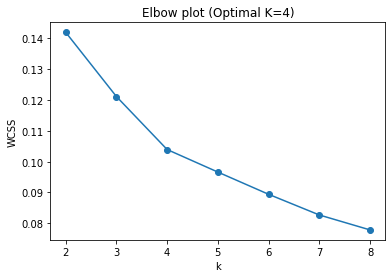

In [14]:
# Simple matplotlib graph (Feel free to adapt this chart using your Plotly knowledge)

import matplotlib.pyplot as plt

plt.title("Elbow plot (Optimal K=4)")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.plot(range(2,9), wcss_vals, '-o')
# plt.plot(cluster_size_range, silhouette_scores, '-o') # We also see a kink at k=4 like for elbow plot
plt.show()

<div class="alert alert-block alert-warning">
Since the elbow is most pronounced for <b><code>k = 4</code></b>, we use this number for k in our K-means clustering. We also see below using PCA that there are 4 distinct clusters, and K-means using <b><code>k = 4</code></b> does a better job at separating the clusters than using <b><code>k = 5</code></b>.
</div>

## 2b. Perform K-means

- To illustrate using a PCA plot the difference between K=5 and K=4 k-means clustering outputs, let us first attempt K-means for `K=5` as an example, and compare the visualised output with `K=4` later on.
- Use `KMeans()` from sklearn to fit and predict cluster labels from `scaled_X` with parameter `k=5` & `random_state=0`. Save the cluster labels produced by your KMeans models to `cluster_labels` for visualisation and further analysis.

In [15]:
NUM_CLUSTERS = 5
kmeans = KMeans(n_clusters = NUM_CLUSTERS, random_state = 0)
cluster_labels = kmeans.fit_predict(scaled_X)

## 2c. Visualise Clusters with Principal Component Analysis

<div class="alert alert-block alert-warning">
<b>Bonus content: Principal Component Analysis</b><br>
<li> <code>scaled_X</code> has 97 columns, and visualisation of cluster labels for datasets of high dimensions is a huge challenge.</li>
<li> Thankfully with the help of Principal Component Analysis, visualising high dimensions on a 2D graph becomes a breeze</li>
<li> We use the <code>PCA(n_components = 2)</code> method from sklearn to compress 97 features into 2 features. </li>
<li> To help you, here are some <a href="https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py">PCA code examples</a>, accompanied with 2D and 3D plots</li> 
</div>

In [16]:
scaled_X.shape

(30, 97)

In [17]:
from sklearn.decomposition import PCA
import numpy as np

# run PCA for visualization of clusters on 2D graph
def plotPCA(dataset, cluster_labels, k):
    pca_output = PCA(n_components = 2, random_state = 0).fit_transform(dataset)

    pca_plot_df = dataset.copy()
    pca_plot_df['labels'] = cluster_labels
    pca_plot_df['pca1'] = pca_output[:,0]
    pca_plot_df['pca2'] = pca_output[:,1]
    # print(pca_plot_df.head())  # uncomment if you need a visualisation of what's going on

    for i in range(len(np.unique(cluster_labels))):
        points_in_cluster = pca_plot_df[pca_plot_df['labels'] == i]
        x = points_in_cluster.pca1
        y = points_in_cluster.pca2
        plt.scatter(x, y, alpha = 0.3, lw=1, label = 'Cluster ' + str(i))
    plt.title('PCA Visualization of Bike Shops (k=' + str(k) + ')')
    plt.legend()
    plt.show()

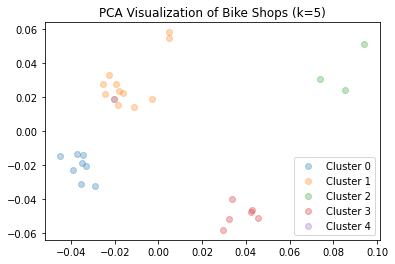

In [18]:
plotPCA(scaled_X, cluster_labels, NUM_CLUSTERS)

- Use `KMeans()` from sklearn to fit and predict cluster labels from `scaled_X`, this time with parameters `k=4` & `random_state=0`. Visualise the cluster label output using the same PCA method as above.

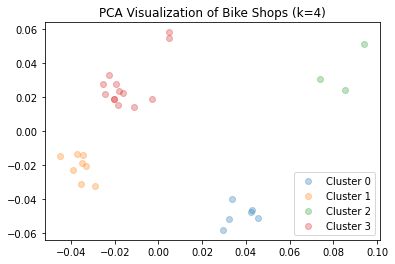

In [19]:
# Visualize k-means result for k = 4
NUM_CLUSTERS = 4 
cluster_labels = KMeans(n_clusters = NUM_CLUSTERS, random_state = 0).fit_predict(scaled_X)
plotPCA(scaled_X, cluster_labels, NUM_CLUSTERS) 

_We can tell from the graph above that there seems to be 4 easily separable clusters for Canondale's bikeshop clients._

Part 3. Analysis of Cluster Results
===
***

We've come to a point where the business user should now examine the `cluster_labels`, and provide the useful business domain to label each cluster with business-relevant labels, based on the common characteristics of each cluster.


## 3a. View names of customers in each cluster

- Using the `cluster_labels` from the `K=4` k-means model, append a column to `orders_by_client` and save it to a new dataframe
- Print out the first 5 rows of this dataframe
- Print out customer names in each cluster

In [20]:
result = orders_by_client.copy().reset_index()
result['cluster'] = cluster_labels
result.head()

bike.id,bikeshop.name,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,cluster
0,Albuquerque Cycles,2,1,0,5,2,2,2,2,3,...,0,1,2,5,3,6,4,9,5,3
1,Ann Arbor Speed,13,20,8,5,5,17,8,12,12,...,6,9,6,2,7,4,5,4,3,1
2,Austin Cruisers,2,3,1,1,5,6,13,9,3,...,4,4,4,2,2,3,2,1,7,1
3,Cincinnati Speed,12,7,3,4,9,6,10,1,3,...,0,1,1,1,0,0,0,0,0,0
4,Columbus Race Equipment,1,3,4,4,5,5,10,0,4,...,1,1,2,0,0,0,1,0,1,0


In [21]:
for i in range(NUM_CLUSTERS):
    print("Customers in Cluster #%d:" % (i+1))
    print(list(result[result.cluster == i]['bikeshop.name']))
    print()

Customers in Cluster #1:
['Cincinnati Speed', 'Columbus Race Equipment', 'Las Vegas Cycles', 'Louisville Race Equipment', 'San Francisco Cruisers', 'Wichita Speed']

Customers in Cluster #2:
['Ann Arbor Speed', 'Austin Cruisers', 'Indianapolis Velocipedes', 'Miami Race Equipment', 'Nashville Cruisers', 'New Orleans Velocipedes', 'Oklahoma City Race Equipment', 'Seattle Race Equipment']

Customers in Cluster #3:
['Ithaca Mountain Climbers', 'Pittsburgh Mountain Machines', 'Tampa 29ers']

Customers in Cluster #4:
['Albuquerque Cycles', 'Dallas Cycles', 'Denver Bike Shop', 'Detroit Cycles', 'Kansas City 29ers', 'Los Angeles Cycles', 'Minneapolis Bike Shop', 'New York Cycles', 'Philadelphia Bike Shop', 'Phoenix Bi-peds', 'Portland Bi-peds', 'Providence Bi-peds', 'San Antonio Bike Shop']



## 3b. Understand the customer profile in each cluster

**Time for more Exploratory Data Analytics!**
- Let's be creative - Dive into the cluster labels deeper with EDA techniques, to understand the customer segments better.

**Questions**
- Based on the **cluster labels and the 97 feature columns**, can you think of ways you can employ pandas to profile each client cluster based on their order history? _(We've provided some hints below, but feel free to explore any other ideas you have.)_
- Determine the bike preferences of the customer segments by inspecting their profiles. How closely do they relate to our hypothesis (Mountain/Road bikes, high/low price range)?

In [22]:
# 1: Find median number of bikes bought by clients in each cluster
cluster_profiles = result.groupby('cluster').median()  
cluster_profiles

bike.id,1,2,3,4,5,6,7,8,9,10,...,88,89,90,91,92,93,94,95,96,97
cluster,,,,,,,,,,,,,,,,,,,,,
0,10.5,7.0,7.0,7.0,8.5,6.5,9.5,2.0,3.5,5.5,...,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0
1,7.5,7.5,2.5,4.0,5.0,8.0,11.0,9.0,9.5,8.5,...,4.5,6.0,3.5,4.0,3.0,4.5,4.0,5.0,4.0,6.5
2,3.0,3.0,1.0,8.0,6.0,2.0,6.0,1.0,0.0,0.0,...,3.0,3.0,3.0,2.0,10.0,7.0,5.0,3.0,1.0,7.0
3,2.0,2.0,2.0,2.0,2.0,1.0,5.0,6.0,7.0,7.0,...,6.0,6.0,5.0,6.0,5.0,7.0,6.0,5.0,10.0,5.0


In [23]:
# 2: Retrieve top 10 most purchased bike ids for each cluster

def get_top10_bike_ids(cluster_id):
    return cluster_profiles.T.sort_values(by=cluster_id, ascending=False).head(10).index.tolist()

cluster0_ids = get_top10_bike_ids(0)
cluster0_ids

[1, 39, 27, 7, 43, 38, 23, 22, 54, 5]

In [24]:
# 3: Prepare method that allows us to generate bike model details for each cluster (using the bike ids)

bike_data = bikes.copy() 
bike_data['price_cat'] = bike_data.price.apply(lambda x: 'high' if x >= bikes.price.median() else 'low')

# Utility method that list top 10 bike models for each cluster
def get_top10_bike_details(cluster_id):
    ids = get_top10_bike_ids(cluster_id) # use the method we wrote in the previous cell
    top10 = bike_data.iloc[ids]
    top10["rank"] = range(1,11) # print rank column since top bikes are ranked in desc order of qty purchased
    return top10[["rank", "model", "category1", "category2", "frame", "price", "price_cat"]]

In [25]:
get_top10_bike_details(0)

,rank,model,category1,category2,frame,price,price_cat
1,1,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,10660,high
39,2,Slice Ultegra D12,Road,Triathalon,Carbon,3200,high
27,3,Synapse Carbon Ultegra 3,Road,Endurance Road,Carbon,3200,high
7,4,Supersix Evo Ultegra 4,Road,Elite Road,Carbon,2660,low
43,5,SuperX Ultegra,Road,Cyclocross,Carbon,2450,low
38,6,Slice Hi-Mod Dura Ace D12,Road,Triathalon,Carbon,4500,high
23,7,Synapse Hi-Mod Dura Ace,Road,Endurance Road,Carbon,5860,high
22,8,Synapse Hi-Mod Disc Red,Road,Endurance Road,Carbon,7460,high
54,9,Scalpel-Si Black Inc.,Mountain,Cross Country Race,Carbon,12790,high
5,10,Supersix Evo Red,Road,Elite Road,Carbon,3940,high


_**Cluster #1: Road** bikes with **carbon** frames, and in the **high price range** are most commonly bought by bikeshops in this cluster._

In [26]:
get_top10_bike_details(1)

,rank,model,category1,category2,frame,price,price_cat
13,1,CAAD Disc Ultegra,Road,Elite Road,Aluminum,2660,low
18,2,CAAD8 Tiagra,Road,Elite Road,Aluminum,1250,low
14,3,CAAD12 Ultegra,Road,Elite Road,Aluminum,2240,low
44,4,SuperX 105,Road,Cyclocross,Carbon,1960,low
29,5,Synapse Carbon Disc 105,Road,Endurance Road,Carbon,2660,low
7,6,Supersix Evo Ultegra 4,Road,Elite Road,Carbon,2660,low
35,7,Synapse Sora,Road,Endurance Road,Aluminum,1030,low
32,8,Synapse Disc Adventure,Road,Endurance Road,Aluminum,2130,low
40,9,Slice Ultegra,Road,Triathalon,Carbon,2700,low
42,10,SuperX Hi-Mod CX1,Road,Cyclocross,Carbon,3500,high


_**Cluster #2: Road** bikes in the **low price range** are most commonly bought by bikeshops in this cluster._

In [27]:
get_top10_bike_details(2)

,rank,model,category1,category2,frame,price,price_cat
59,1,Scalpel-Si Carbon 4,Mountain,Cross Country Race,Carbon,4260,high
62,2,Scalpel 29 Carbon 2,Mountain,Cross Country Race,Carbon,5330,high
53,3,Trigger Carbon 4,Mountain,Over Mountain,Carbon,3200,high
71,4,F-Si 2,Mountain,Cross Country Race,Aluminum,2060,low
50,5,Trigger Carbon 1,Mountain,Over Mountain,Carbon,8200,high
92,6,Trail 5,Mountain,Sport,Aluminum,815,low
12,7,CAAD12 Red,Road,Elite Road,Aluminum,3200,high
84,8,Habit Carbon 3,Mountain,Trail,Carbon,3730,high
60,9,Scalpel-Si 5,Mountain,Cross Country Race,Aluminum,3200,high
4,10,Supersix Evo Hi-Mod Utegra,Road,Elite Road,Carbon,4260,high


_**Cluster #3: Mountain** bikes in the **high price range** are most commonly bought by bikeshops in this cluster._

It is no wonder that bike shops under this cluster are called `'Ithaca Mountain Climbers'` and `'Pittsburgh Mountain Machines'`.

In [28]:
get_top10_bike_details(3)

,rank,model,category1,category2,frame,price,price_cat
96,1,Catalyst 4,Mountain,Sport,Aluminum,415,low
72,2,F-Si 3,Mountain,Cross Country Race,Aluminum,1840,low
70,3,F-Si 1,Mountain,Cross Country Race,Aluminum,2340,low
16,4,CAAD12 105,Road,Elite Road,Aluminum,1680,low
30,5,Synapse Carbon 105,Road,Endurance Road,Carbon,2240,low
29,6,Synapse Carbon Disc 105,Road,Endurance Road,Carbon,2660,low
36,7,Synapse Claris,Road,Endurance Road,Aluminum,870,low
19,8,CAAD8 Sora,Road,Elite Road,Aluminum,1030,low
18,9,CAAD8 Tiagra,Road,Elite Road,Aluminum,1250,low
40,10,Slice Ultegra,Road,Triathalon,Carbon,2700,low


_**Cluster #4:** A mixture of mountain and road bikes in the **low price range** are most commonly bought by bikeshops in this cluster._

Part 4. Conclusion & Hypothesis Verification
===
***


**To summarise, the preferences for each customer segment are:**

* 4 segments were generated for our customer base.
* Of these segments, Clusters 2 & 4 mostly purchased **low-price** bikes. The other 2 segments went for bikes mostly in the **high-price** range.
* Of the 2 groups buying high-price bikes, one group mostly bought **Mountain Bikes** (Cluster 3) while the other group mostly bought **Road bikes with Carbon frames** (Cluster 1).

All in all, the **hypothesis is confirmed** - bike shops do focus on purchasing bike models based on similar features, namely:
* **Mountain or Road Bikes** and 
* **price tier** (high/premium, low/affordable, or mid-tier/in-between).